In [35]:
import os
import pandas as pd
import numpy as np
from Step03_Denosing.Wiener_Denosing import WienerDenoising
from config import WINDOW_DIR

In [36]:
participant_id = 'P03'
file_path = os.path.join(WINDOW_DIR, f"{participant_id}_processed_GD.csv")

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Loaded data for participant: {participant_id}")
else:
    print(f"File not found: {file_path}")


Loaded data for participant: P03


In [37]:
df.head()

,participant,session,windowNumber,startTime,endTime,polarHR,galaxyPPG,galaxyACC,e4BVP,e4ACC,polarECG,polarACC,isPadded,gdHR,gdIBI,gdSDNN,gdRMSSD,gdPeaks
0,P03,adaptation,1,1710826380494,1710826388494,75.625,1904019.0;1899979.411009396;1897612.8152814284...,1.4058979749679563;9.690397262573242;-1.791501...,20.09;19.56;18.94;18.32;17.8;17.47;17.41;17.63...,-61.0;-19.0;4.0;-60.50098052948592;-19.0;4.0;-...,4;7;9;24;38;31;9;2;14;36;52;33;2;7;12;4;14;26;...,-825;227;499;-818;224;504;-819;223;499;-820;22...,False,70.623742,849.572650,36.307185,23.864757,29;133;237;344;455;571;687;802;912;1023
1,P03,adaptation,2,1710826382494,1710826390494,74.750,1905178.0;1906209.7866461223;1907698.937085712...,1.415478229522705;9.726323127746582;-1.8010822...,9.49;7.08;4.69;2.43;0.4;-1.38;-2.93;-4.31;-5.6...,-46.0;8.0;36.0;-46.998038941028156;9.497058411...,137;139;156;173;165;163;153;134;122;96;60;36;2...,-797;221;515;-796;223;517;-791;224;523;-798;22...,False,69.026549,869.230769,18.388132,21.365079,83;194;310;426;541;651;762;874;987
2,P03,adaptation,3,1710826384494,1710826392494,73.875,1953182.0;1955157.9362010402;1957178.959894189...,1.4442188739776611;9.81733512878418;-1.3292561...,-24.65;-24.35;-23.69;-22.86;-21.96;-20.84;-19....,-35.0;12.0;55.0;-32.50490264742961;11.50098052...,9;2;21;26;7;-12;-2;19;21;16;21;33;31;26;33;38;...,-793;225;518;-794;224;515;-796;225;515;-795;22...,False,69.333333,865.384615,15.924590,16.187824,50;166;281;391;502;614;727;839;950
3,P03,adaptation,4,1710826386494,1710826394494,73.000,1993428.0;1990761.4732771383;1988854.223052056...,1.353206753730774;9.826915740966797;-1.1017258...,-170.75;-191.03;-205.04;-211.88;-211.37;-204.2...,-61.0;18.0;-2.0;-61.0;18.0;-2.0;-61.0;18.0;-2....,55;64;79;76;60;48;64;76;48;26;45;52;40;50;64;5...,-812;190;506;-811;190;505;-809;185;505;-812;18...,False,69.781312,859.829060,9.245003,8.600261,20;130;241;353;466;578;689;800;912;1026
4,P03,adaptation,5,1710826388494,1710826396494,72.125,1995643.0;1995355.4529019003;1995095.622695549...,1.4035029411315918;9.860445976257324;-1.199923...,53.06;52.4;51.12;49.36;47.32;45.17;43.02;40.85...,-61.0;18.0;3.0;-61.0;17.500980529485922;3.4990...,108;117;117;137;153;153;153;165;182;180;158;14...,-782;203;534;-778;202;540;-777;202;543;-777;20...,False,70.428894,851.923077,23.886885,21.950532,93;206;318;429;540;652;766;875;979


In [38]:
wiener = WienerDenoising()


In [44]:
sample_index = 189
ppg = np.array([float(x) for x in df.loc[sample_index, 'galaxyPPG'].split(';')])
acc_x = np.array([float(x) for x in df.loc[sample_index, 'galaxyACC'].split(';')[::3]])
acc_y = np.array([float(x) for x in df.loc[sample_index, 'galaxyACC'].split(';')[1::3]])
acc_z = np.array([float(x) for x in df.loc[sample_index, 'galaxyACC'].split(';')[2::3]])

print(f"Sample PPG length: {len(ppg)}")
print(f"Sample Accelerometer length: {len(acc_x)}")


Sample PPG length: 200
Sample Accelerometer length: 200


In [45]:
denoised_signal, heart_rate = wiener.process_galaxy(ppg, acc_x, acc_y, acc_z)
print(denoised_signal)


[ 0.00841566  0.00769355  0.00733571  0.00490678 -0.00065854 -0.00816321
 -0.01482093 -0.01795009 -0.01645963 -0.0111677  -0.00394578  0.00347887
  0.01014401  0.01563402  0.01952892  0.02123731  0.02043589  0.0176351
  0.01415477  0.01127995  0.00916425  0.00643195  0.00099669 -0.00834006
 -0.02065041 -0.03297619 -0.04178253 -0.04478314 -0.04188862 -0.03472272
 -0.02524521 -0.01463639 -0.00325891  0.00847483  0.01929698  0.02724024
  0.0307791   0.03003647  0.0269436   0.02400918  0.02249279  0.02136049
  0.01791456  0.00976532 -0.00321762 -0.01837041 -0.0315062  -0.03909675
 -0.0398713  -0.03485795 -0.02609129 -0.01514879 -0.00265262  0.01104089
  0.024774    0.03626251  0.04298303  0.04367518  0.03925714  0.03232133
  0.02544869  0.01951923  0.01326011  0.00439339 -0.00841471 -0.02417237
 -0.03968803 -0.05106432 -0.05551365 -0.05235909 -0.04279988 -0.02892494
 -0.01284509  0.00354274  0.01835678  0.02970225  0.03617685  0.03762332
  0.03540574  0.03171113  0.02814186  0.02454638  0.

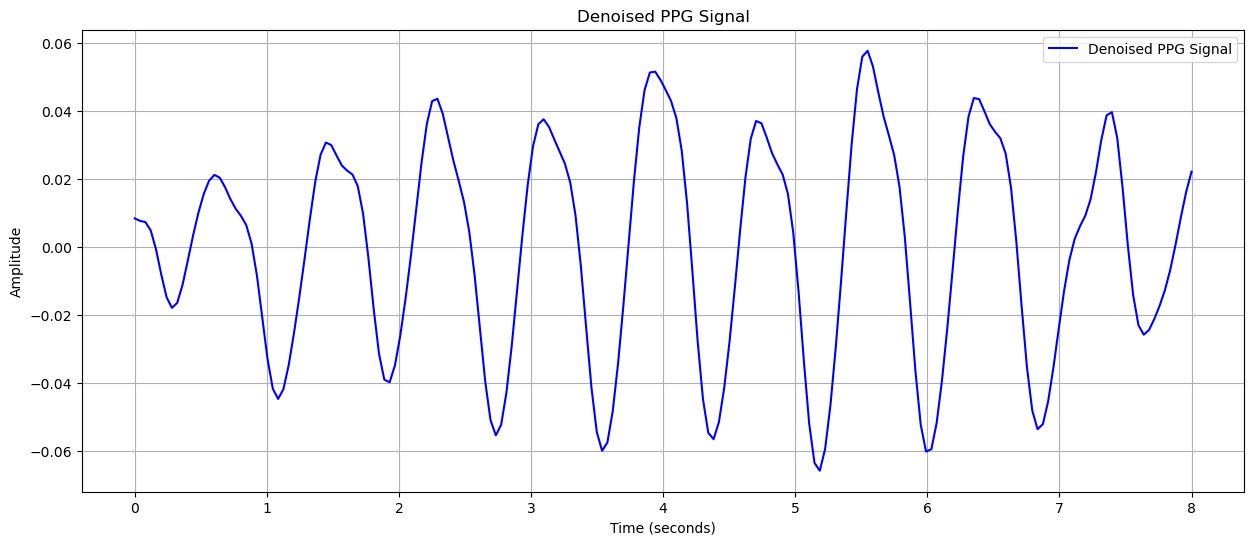

In [46]:
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 25  # Hz
window_duration = 8  # seconds

time_axis = np.linspace(0, window_duration, int(sampling_rate * window_duration))

plt.figure(figsize=(15, 6))
plt.plot(time_axis, denoised_signal, label='Denoised PPG Signal', color='blue')
plt.title('Denoised PPG Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()
